## **Inome Prediction**

**In this Dataset we have to predict thr income of people that they earn earn mmore than 50k ar less than 50k.**

In [1]:
# importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult.csv


In [50]:
#Loading the dataset
import io
df = pd.read_csv('adult.csv',sep=',\s')

In [51]:
#reading the dateset
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [52]:
#adding columns
df.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain',
            'caital_loss','hours_per_week','native_country','income']

In [53]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,caital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [54]:
#checking shape of dataset
df.shape

(32560, 15)

Observation:

There are 32560and 15 columns are present in our dataset.

In [55]:
#checking  for null values
df.isnull().values.any()

False

Observation:

we see there are no null values but there is '?' present in our dataset which is treated as null value.

In [56]:
#checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  caital_loss     32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Oservation:
    
There are no missing values in our dataset but '?' is present so we will encode this as Nan value.

In [57]:
#Replacing the question mark(?) with NaN
df=df.replace('?',np.nan)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,caital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [58]:
#checking for null values again
df.isnull().values.any()

True

Now it tells that nan values are present.so we check null values for particular column.

In [59]:
#checking for null values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
caital_loss          0
hours_per_week       0
native_country     583
income               0
dtype: int64

Observation:

1-There are 1836 null values are present in workclass column

2-1843 null values are present in occupation column.

3-583 null values present in native_country column.

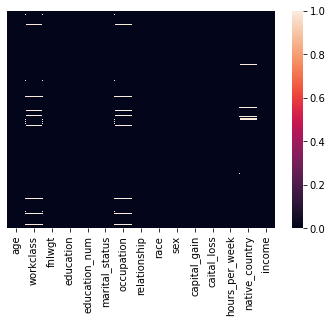

In [60]:
#checking null values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

In [61]:
#checking the information of column agian
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  caital_loss     32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Obsevation:

workclass, occupation , native_country contain missing values.

All of these varibles are categorical datatype .So, we impute the missing values with most frequent value i.e. mode.

In [62]:
#Imputing the missing value with mode

for col in ['workclass','occupation','native_country']:
  df[col].fillna(df[col].mode()[0],inplace=True)

In [63]:
#now again check for missing values
df.isnull().values.any()

False

null values are removed.

# Now Our data is ready for Visualisation without any issing values.

In [64]:
#Putting the data into pandas dataframe

df_income=pd.DataFrame(df)
df_income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,caital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [65]:
#checking the shape
df_income.shape

(32560, 15)

In [66]:
#checking the various columns
df_income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'caital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [67]:
#checking the datatypes of columns
df_income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
caital_loss        int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Observation

**Numeric Features**= age , fnlwgt, education_num, capital_gain, capita_loss, hours per week.

**Categorical Features**= workclass, education, marital_status, occupation , relationship, race , sex, native_country, income

## **For Analyzing The Data with Target i.e. income we have to change income into numeric type**

In [68]:
df_income['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [69]:
#Changing the datatype of the target column  by applying Label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_income['income']=le.fit_transform(df_income['income'])

In [70]:
df_income

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,caital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [71]:
df_income['income'].unique()

array([0, 1])

Observation:

**<=50k  = 0**

**>50k  = 1**


## **Summary Statistics**

In [72]:
df_income.describe()

,age,fnlwgt,education_num,capital_gain,caital_loss,hours_per_week,income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Observation:

1- Minimum age is 17 years and Maximum age is 90 years.

2-Minimum education_num is 1 and maximum is 16.

3- Minimum hours per week is 1 and maximum is 99.

4- In age ,fnlwgt, education_num, capital_gain,capital_loss attributes mean is greater than the median therefore in these attrtbutes data is right skewed.

5- difference b/w 75% and max is higher in age, fnlwgt, capital_gain,capital_loss,and hours_per_week therefore outliers present in these column which we have to remove it. 

## **Exploring Data Varible**

In [74]:
for column in df_income.columns:
    if df_income[column].dtypes==object:
        print(str(column)+':'+str(df_income[column].unique()))
        print(df_income[column].value_counts())
        print('********************************************************************')
        print('\n')

workclass:['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
********************************************************************


education:['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
****

### **To Check the Correlation**

In [75]:
df_cor=df_income.corr()
df_cor

,age,fnlwgt,education_num,capital_gain,caital_loss,hours_per_week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
caital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


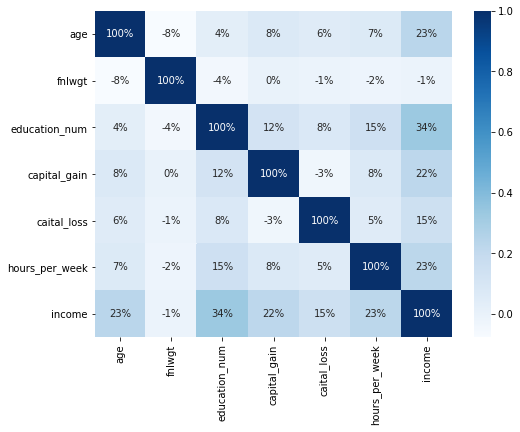

In [76]:
#checking correlaion using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='Blues')

Text(0.5, 1.0, 'correlation with target variable')

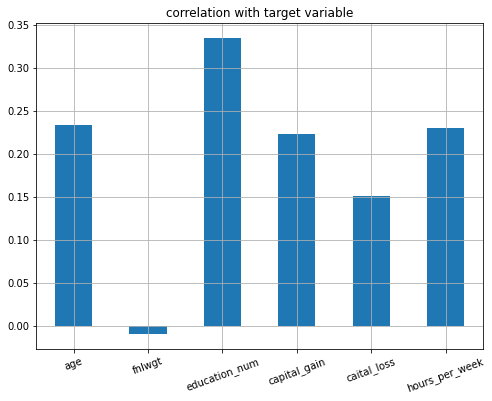

In [77]:
plt.figure(figsize=(8,6))
df_income.drop('income',axis=1,).corrwith(df_income['income']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable")

Observation:

1-fnlwgt is only negatively correlated with target variable income.

2-education_num is highly correlated with target variable among all input variables.

## **Exploratory Data Analysis**

our feature varible of interest is income.

it refers to the monthly income of the people.

1 stands for greater than 50k and 0 stands for less than or equal to 50k.

### **Univariate Analysis**

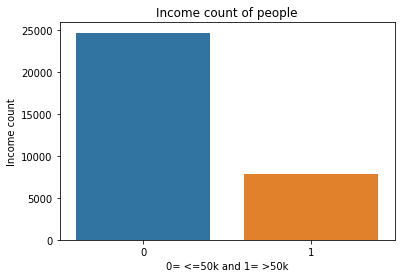

Observation: 
 0    24719
1     7841
Name: income, dtype: int64


In [93]:
#checking income count of people
plt.subplots(figsize=(6,4))
sns.countplot(x="income", data=df_income)
plt.title("Income count of people")
plt.xlabel('0= <=50k and 1= >50k')
plt.ylabel("Income count")
plt.show()

print("Observation:",'\n',df_income.income.value_counts())

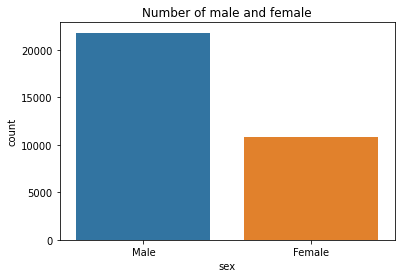

Observation: 
 Male      21789
Female    10771
Name: sex, dtype: int64


In [94]:
#checking number of male and female
plt.subplots(figsize=(6,4))
sns.countplot(x="sex", data=df_income)
plt.title("Number of male and female")
plt.show()

print("Observation:",'\n',df_income.sex.value_counts())

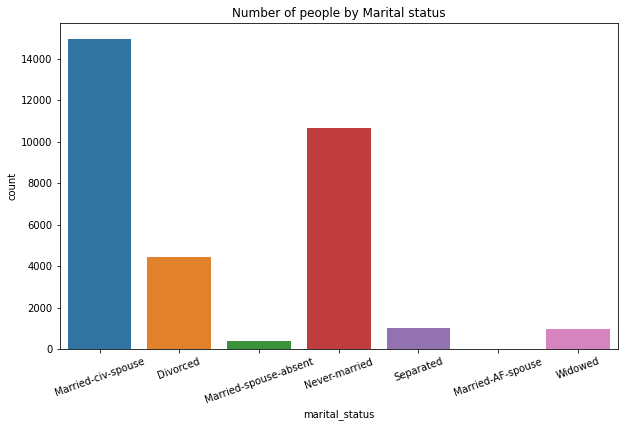

Observation: 
 Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64


In [95]:
#Marital status of people
plt.subplots(figsize=(10,6))
sns.countplot(x="marital_status", data=df_income)
plt.title("Number of people by Marital status")
plt.xticks(rotation=20)
plt.show()

print("Observation:",'\n',df_income.marital_status.value_counts())

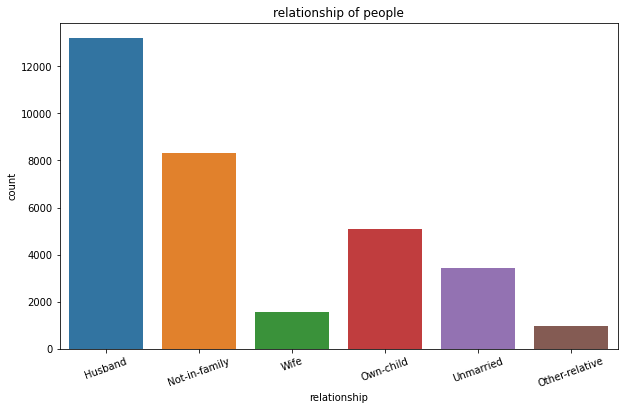

Observation: 
 Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [96]:
# relationship status of people
plt.subplots(figsize=(10,6))
sns.countplot(x="relationship", data=df_income)
plt.title("relationship of people")
plt.xticks(rotation=20)
plt.show()

print("Observation:",'\n',df_income.relationship.value_counts())

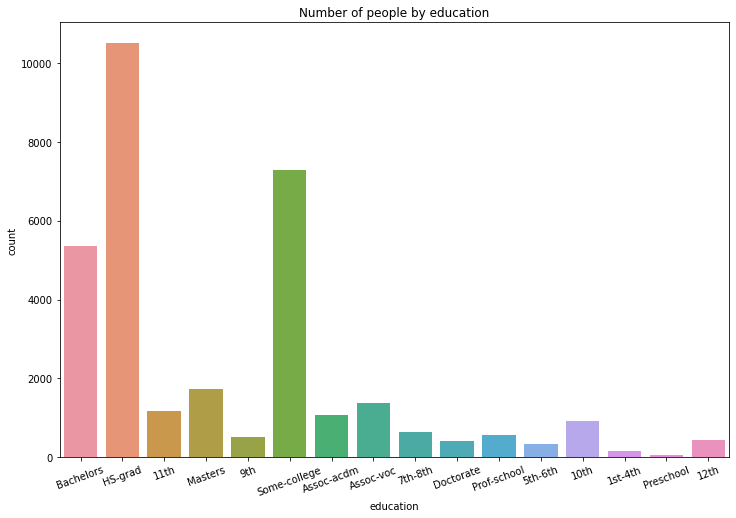

Observation: 
 HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


In [97]:
# Checking the number of people by education
plt.subplots(figsize=(12,8))
sns.countplot(x="education", data=df_income)
plt.title("Number of people by education")
plt.xticks(rotation=20)
plt.show()

print("Observation:",'\n',df_income.education.value_counts())

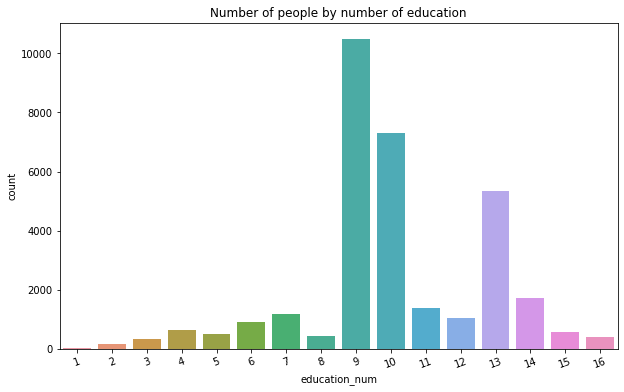

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64


In [91]:
# Checking the number of people by education number
plt.subplots(figsize=(10,6))
sns.countplot(x="education_num", data=df_income)
plt.title("Number of people by number of education")
plt.xticks(rotation=20)
plt.show()

print("Observation:",'\n',df_income.education_num.value_counts())

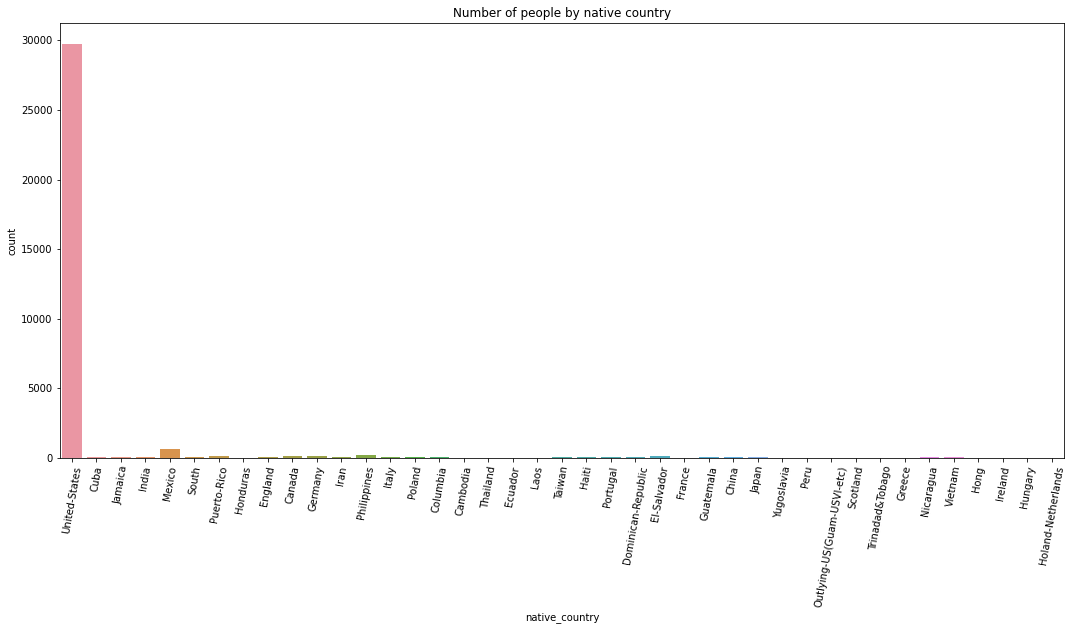

Observation: 
 United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [102]:
# Checking the number of people by Native country
plt.subplots(figsize=(18,8))
sns.countplot(x="native_country", data=df_income)
plt.title("Number of people by native country")
plt.xticks(rotation=80)
plt.show()

print("Observation:",'\n',df_income.native_country.value_counts())

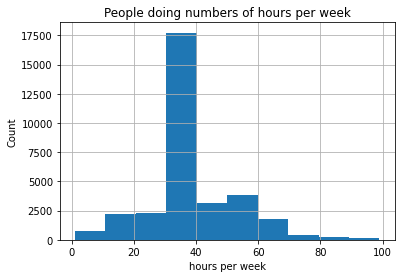

In [103]:
#checking numbers of hours per week
df_income["hours_per_week"].hist()
plt.xlabel('hours per week')
plt.ylabel('Count')
plt.title('People doing numbers of hours per week')
plt.show()

Observation: 

Approx. 17500 people doing 30 to 40 hours_per_week

# **Biverate Analysis**

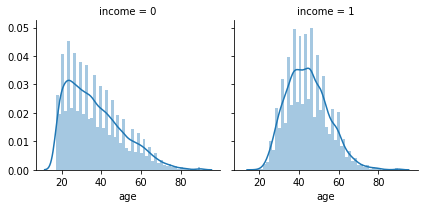

In [105]:
#Exploring Age vs Income via FaceGrid

facet=sns.FacetGrid(df_income, col='income')
facet.map(sns.distplot, "age")
plt.show()

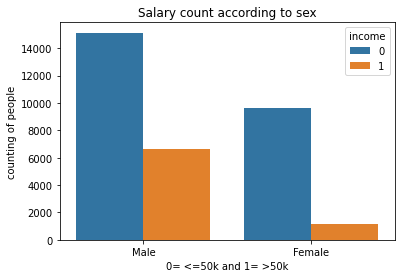

Observation: 
 sex     income
Female  0          9592
        1          1179
Male    0         15127
        1          6662
Name: income, dtype: int64


In [106]:
#Sex vs Income

sns.countplot(x="sex",hue="income", data=df_income)
plt.title("Salary count according to sex")
plt.xlabel('0= <=50k and 1= >50k')
plt.ylabel("counting of people")
plt.show()

print("Observation:",'\n',df_income.groupby('sex')['income'].value_counts())

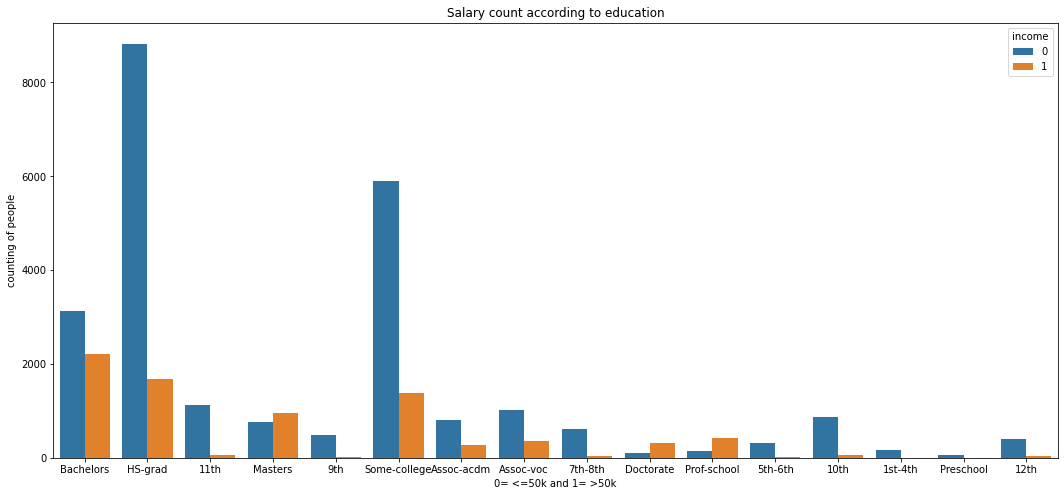

Observation: 
 education     income
10th          0          871
              1           62
11th          0         1115
              1           60
12th          0          400
              1           33
1st-4th       0          162
              1            6
5th-6th       0          317
              1           16
7th-8th       0          606
              1           40
9th           0          487
              1           27
Assoc-acdm    0          802
              1          265
Assoc-voc     0         1021
              1          361
Bachelors     0         3133
              1         2221
Doctorate     1          306
              0          107
HS-grad       0         8826
              1         1675
Masters       1          959
              0          764
Preschool     0           51
Prof-school   1          423
              0          153
Some-college  0         5904
              1         1387
Name: income, dtype: int64


In [107]:
# Education vs Income

plt.subplots(figsize=(18,8))
sns.countplot(x="education",hue="income", data=df_income)
plt.title("Salary count according to education")
plt.xlabel('0= <=50k and 1= >50k')
plt.ylabel("counting of people")
plt.show()

print("Observation:",'\n',df_income.groupby('education')['income'].value_counts())

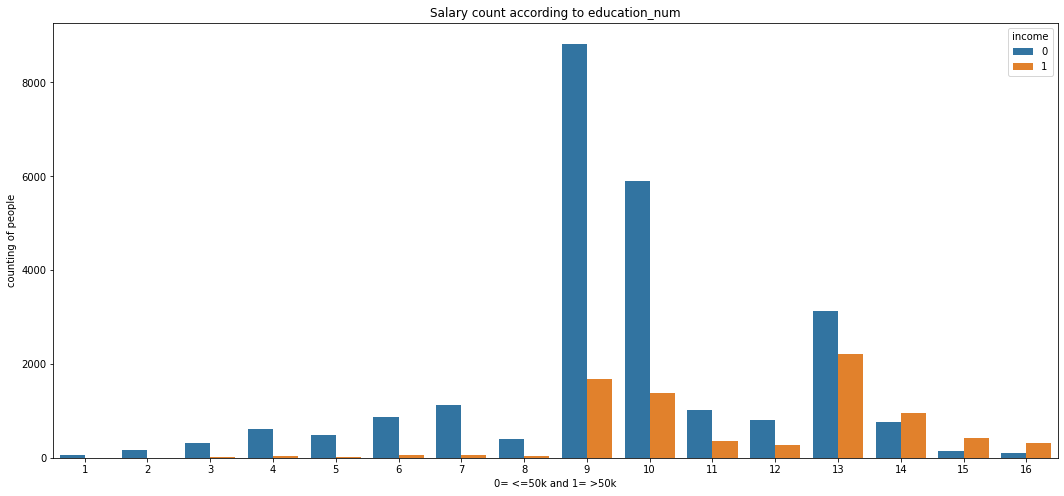

Observation: 
 education_num  income
1              0           51
2              0          162
               1            6
3              0          317
               1           16
4              0          606
               1           40
5              0          487
               1           27
6              0          871
               1           62
7              0         1115
               1           60
8              0          400
               1           33
9              0         8826
               1         1675
10             0         5904
               1         1387
11             0         1021
               1          361
12             0          802
               1          265
13             0         3133
               1         2221
14             1          959
               0          764
15             1          423
               0          153
16             1          306
               0          107
Name: income, dtype: int64


In [108]:
# Education_num vs Income

plt.subplots(figsize=(18,8))
sns.countplot(x="education_num",hue="income", data=df_income)
plt.title("Salary count according to education_num")
plt.xlabel('0= <=50k and 1= >50k')
plt.ylabel("counting of people")
plt.show()

print("Observation:",'\n',df_income.groupby('education_num')['income'].value_counts())

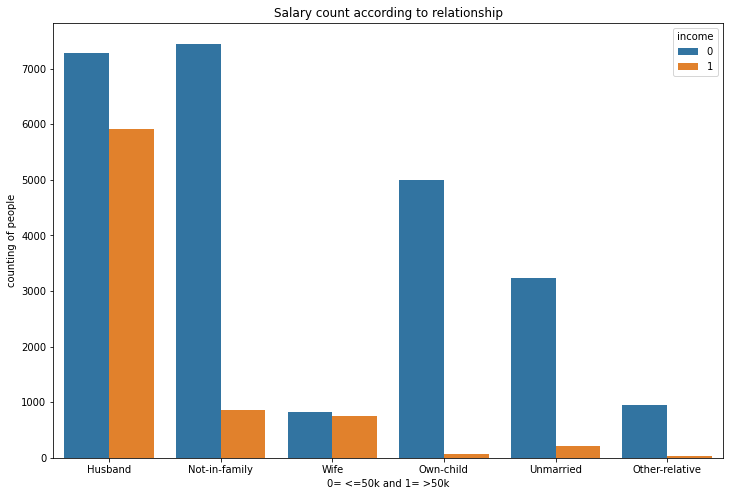

Observation: 
 relationship    income
Husband         0         7275
                1         5918
Not-in-family   0         7448
                1          856
Other-relative  0          944
                1           37
Own-child       0         5001
                1           67
Unmarried       0         3228
                1          218
Wife            0          823
                1          745
Name: income, dtype: int64


In [109]:
# Relationshio vs Income

plt.subplots(figsize=(12,8))
sns.countplot(x="relationship",hue="income", data=df_income)
plt.title("Salary count according to relationship")
plt.xlabel('0= <=50k and 1= >50k')
plt.ylabel("counting of people")
plt.show()

print("Observation:",'\n',df_income.groupby('relationship')['income'].value_counts())

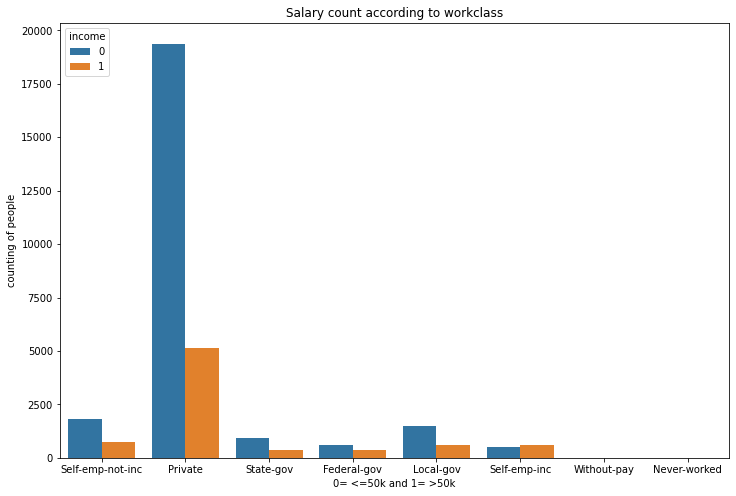

Observation: 
 workclass         income
Federal-gov       0           589
                  1           371
Local-gov         0          1476
                  1           617
Never-worked      0             7
Private           0         19378
                  1          5154
Self-emp-inc      1           622
                  0           494
Self-emp-not-inc  0          1817
                  1           724
State-gov         0           944
                  1           353
Without-pay       0            14
Name: income, dtype: int64


In [110]:
# Workclass vs Income

plt.subplots(figsize=(12,8))
sns.countplot(x="workclass",hue="income", data=df_income)
plt.title("Salary count according to workclass")
plt.xlabel('0= <=50k and 1= >50k')
plt.ylabel("counting of people")
plt.show()

print("Observation:",'\n',df_income.groupby('workclass')['income'].value_counts())

## **Checking Skewness**

In [111]:
#checking skewness
df_income.skew()

age                0.558738
fnlwgt             1.446972
education_num     -0.311630
capital_gain      11.953690
caital_loss        4.594549
hours_per_week     0.227636
income             1.212383
dtype: float64

In [113]:
#Treating skewness via square root method and cube root method

df_income.skew()
for col in df_income.skew().index:
  if col in df_income.describe().columns:
    if df_income[col].skew()>0.55:
      df_income[col]=np.sqrt(df_income[col])
    if df_income[col].skew()<-0.55:
      df_income[col]=np.cbrt(df_income[col])

### **converting the categorical data into numeric variables**

In [114]:
# Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for column in df_income.columns:
  if df_income[column].dtype==np.number:
    continue
  df_income[column]=le.fit_transform(df_income[column])

In [115]:
df_income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,caital_loss,hours_per_week,native_country,income
0,7.071068,5,288.636450,9,12,2,3,0,4,1,0.0,0.0,12,38,0.0
1,6.164414,3,464.377002,11,8,0,5,1,4,1,0.0,0.0,39,38,0.0
2,7.280110,3,484.480134,1,6,2,5,0,2,1,0.0,0.0,39,38,0.0
3,5.291503,3,581.729318,9,12,2,9,5,2,0,0.0,0.0,39,4,0.0
4,6.082763,3,533.462276,12,13,2,3,5,4,0,0.0,0.0,39,38,0.0


## **plotting Outliers**

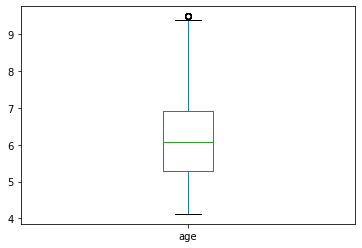

In [116]:
df_income['age'].plot.box()

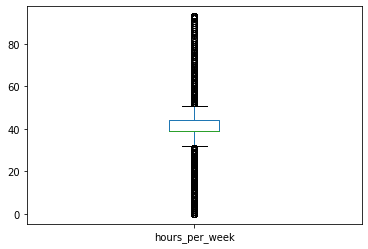

In [117]:
df_income['hours_per_week'].plot.box()

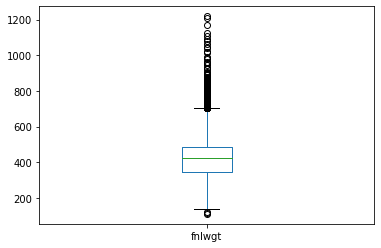

In [118]:
df_income['fnlwgt'].plot.box()

Obsevation:

There are some outliers are present ,which we have to remove it.

### **Removing Outliers**

In [119]:
#treating outliers using z score metod
from scipy.stats import zscore
z=np.abs(zscore(df_income))
z

array([[0.87717289, 1.72133587, 1.08850574, ..., 2.25444135, 0.26137428,
        0.5632099 ],
       [0.04529753, 0.08522344, 0.3801927 , ..., 0.03112222, 0.26137428,
        0.5632099 ],
       [1.06897372, 0.08522344, 0.54819853, ..., 0.03112222, 0.26137428,
        0.5632099 ],
       ...,
       [1.3769523 , 0.08522344, 0.24342694, ..., 0.03112222, 0.26137428,
        0.5632099 ],
       [1.30712916, 0.08522344, 0.2506509 , ..., 1.67802528, 0.26137428,
        0.5632099 ],
       [1.00565793, 0.81805622, 0.98367672, ..., 0.03112222, 0.26137428,
        1.77553698]])

In [120]:
threshold=3
print(np.where(z>3))

(array([    3,     7,     9, ..., 32550, 32552, 32559]), array([13, 10, 12, ...,  8,  8, 10]))


In [121]:
new_income=df_income[(z<3).all(axis=1)]

In [122]:
#shecking the shape
print(df_income.shape,'\t\t',new_income.shape)

(32560, 15) 		 (27561, 15)


In [123]:
df=new_income
df.shape

(27561, 15)

## **Model Training**

In [124]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,caital_loss,hours_per_week,native_country,income
0,7.071068,5,288.636450,9,12,2,3,0,4,1,0.0,0.0,12,38,0.0
1,6.164414,3,464.377002,11,8,0,5,1,4,1,0.0,0.0,39,38,0.0
2,7.280110,3,484.480134,1,6,2,5,0,2,1,0.0,0.0,39,38,0.0
4,6.082763,3,533.462276,12,13,2,3,5,4,0,0.0,0.0,39,38,0.0
5,7.000000,3,400.233682,6,4,3,7,1,2,0,0.0,0.0,15,22,0.0


In [127]:
#splitting data into input and output variable
x=df.drop("income",axis=1) #separating independent and target variable
y=df["income"]
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,caital_loss,hours_per_week,native_country
0,7.071068,5,288.636450,9,12,2,3,0,4,1,0.0,0.0,12,38
1,6.164414,3,464.377002,11,8,0,5,1,4,1,0.0,0.0,39,38
2,7.280110,3,484.480134,1,6,2,5,0,2,1,0.0,0.0,39,38
4,6.082763,3,533.462276,12,13,2,3,5,4,0,0.0,0.0,39,38
5,7.000000,3,400.233682,6,4,3,7,1,2,0,0.0,0.0,15,22


In [126]:
y.head()

0    0.0
1    0.0
2    0.0
4    0.0
5    0.0
Name: income, dtype: float64

In [128]:
#Checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(27561, 14) 		 (27561,)


In [129]:
 # scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [130]:
# Splittinfg the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [132]:
#checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(22048, 14) 		 (5513, 14)


In [133]:
#checking the shape
print(y_train.shape,'\t\t',y_test.shape)

(22048,) 		 (5513,)


In [134]:
#Importing all the model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing error metrics 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

## **Finding best Parameters**

In [135]:
#using GridSearchCV to find out the best parameter in logistic Regression

parameters={'C':[1,10],'random_state':range(42,100)}
lr=LogisticRegression()

clf=GridSearchCV(lr,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [136]:
#using GridSearchCV to find out the best parameter in KNeighboursClassifier

parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 22}


In [137]:
# Models with its best parameters

LR=LogisticRegression(random_state=42)
KNN=KNeighborsClassifier(n_neighbors=22)
SVC=SVC()

In [138]:
#All Algorithms by using or loop
model=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]

for m in model:
  m.fit(x_train,y_train)
  m.score(x_test,y_test)
  predm=m.predict(x_test)
  print('Accuracy score of',m,'is')
  print(accuracy_score(y_test,predm))
  print(confusion_matrix(y_test,predm))
  print('*********************************************************************************************************************************')
  print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is
0.8311264284418647
[[4144  202]
 [ 729  438]]
*********************************************************************************************************************************


Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is
0.7796118265916924
[[3452  894]
 [ 321  846]]
*********************************************************************************************************************************


Accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=T

In [141]:
# Cross Validate the Models

models=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]

for m in models:
  score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
  print('Model',m,)
  print('Score:',score)
  print('Mean Score:',score.mean())
  print('Standard Deviation',score.std())
  print('*********************************************************************************************************************************')
  print('\n')


Model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score: [0.82299601 0.8222061  0.8287373  0.8254717  0.82365747 0.83236575
 0.81748911 0.82510885 0.82510885 0.82438316]
Mean Score: 0.824752431204276
Standard Deviation 0.0037185088418084057
*********************************************************************************************************************************


Model GaussianNB(priors=None, var_smoothing=1e-09)
Score: [0.76967719 0.77793904 0.78882438 0.77249637 0.76306241 0.7841074
 0.77213353 0.78011611 0.79535559 0.79208999]
Mean Score: 0.7795802003924039
Standard Deviation 0.0099540411333038
************************************************************************************************************

**Above all SVC is giving best score**

Now we use some Boosting Technique to boost up score.After that we decide which Model is Best.

## **Using Ensemble Technique to Boost our score**

In [143]:
#importing boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [145]:
#All Algorithm by using for loop

model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
  m.fit(x_train,y_train)
  m.score(x_test,y_test)
  predm=m.predict(x_test)
  print('Accuracy score of',m,'is')
  print(accuracy_score (y_test,predm))
  print(confusion_matrix(y_test,predm))
  print(classification_report(y_test,predm))
  print('*********************************************************************************************************************************')
  print('\n')

Accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is
0.8492653727553057
[[4052  294]
 [ 537  630]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      4346
         1.0       0.68      0.54      0.60      1167

    accuracy                           0.85      5513
   macro avg       0.78      0.74      0.75      5513
weighted avg       0.84      0.85      0.84      5513

***********************************************************

Gradient Boosting Classifier gives best score and its is not suffering from underfitting and overfitting

**So we choose Gradient Boosting Classifier as oir best model.**

In [146]:
#Gradient Boosting Classifier with best result

gbc=GradientBoostingClassifier(learning_rate=0.1,random_state=59,n_estimators=200)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.863595138762924
[[4117  229]
 [ 523  644]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      4346
         1.0       0.74      0.55      0.63      1167

    accuracy                           0.86      5513
   macro avg       0.81      0.75      0.77      5513
weighted avg       0.86      0.86      0.86      5513



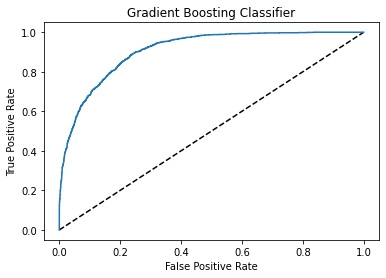

0.7495751000338736


In [147]:
#AUC_ROC Curve and finding our score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()

auc_score=roc_auc_score(y_test,predgbc)
print(auc_score)

In [148]:
#Saving Our Model

from sklearn.externals import joblib

#save the model as a pickle in a file
joblib.dump(gbc,'Adult_income_gbc.pkl')

['Adult_income_gbc.pkl']